# SBML

## import

In [ ]:
import matplotlib.pyplot as plt

from modelbase.ode import Model, Simulator
from modelbase.sbml.parser import Parser

from pathlib import Path

In [ ]:
file = Path("assets") / "00001-sbml-l3v2.xml"
parser = Parser(file=file)
m, y0 = parser.build_model_from_sbml()

In [ ]:
s = Simulator(m)
s.initialise(y0)
t, y = s.simulate(10)

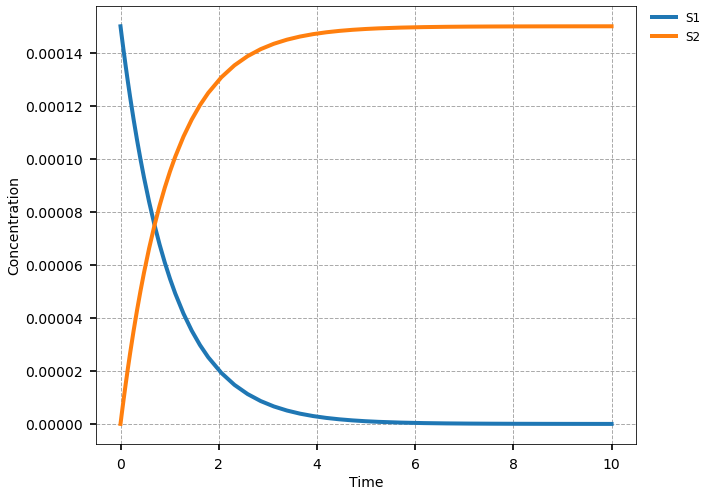

In [ ]:
fig, ax = s.plot(xlabel="Time", ylabel="Concentration")
plt.show()

## export

In [1]:
import matplotlib.pyplot as plt

from modelbase.ode import Model, Simulator
from modelbase.ode import ratelaws as rl
from modelbase.ode import ratefunctions as rf

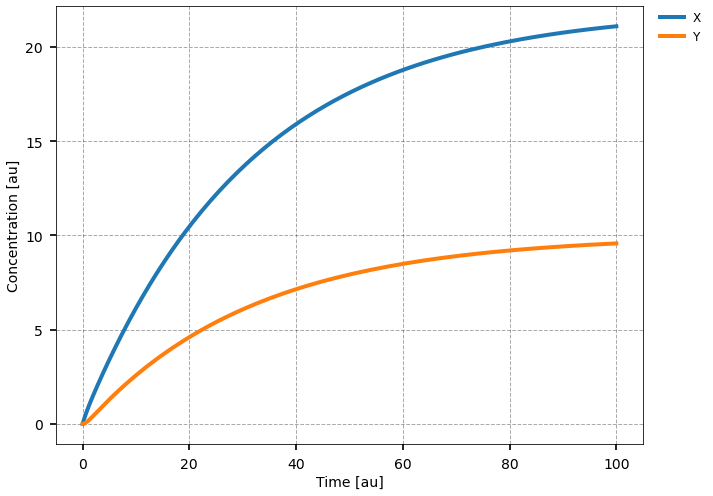

In [2]:
m = Model()
m.add_parameters({"v0": 1, "k1p": 0.5, "k1m": 1, "k2": 0.1})
m.add_compounds(["X", "Y"])
m.add_reaction_from_ratelaw(rate_name="v0", ratelaw=rl.Constant(product="X", k="v0"))
m.add_reaction_from_ratelaw(
    rate_name="v1",
    ratelaw=rl.ReversibleMassAction(
        substrates=["X"], products=["Y"], k_fwd="k1p", k_bwd="k1m"
    ),
)
m.add_reaction_from_ratelaw(
    rate_name="v2", ratelaw=rl.MassAction(substrates=["Y"], products=[], k_fwd="k2")
)

s = Simulator(m)
s.initialise({"X": 0, "Y": 0})
t, y = s.simulate(100)
fig, ax = s.plot(xlabel="Time [au]", ylabel="Concentration [au]")
plt.show()

In [3]:
print(m.write_sbml_model())

<?xml version="1.0" encoding="UTF-8"?>
<sbml xmlns="http://www.sbml.org/sbml/level3/version2/core" xmlns:fbc="http://www.sbml.org/sbml/level3/version1/fbc/version2" sboTerm="SBO:0000062" level="3" version="2" fbc:required="false">
  <model id="modelbase__45__model__45__2021__45__01__45__11" name="modelbase__45__model" substanceUnits="mole" timeUnits="second" extentUnits="mole" fbc:strict="true">
    <listOfUnitDefinitions>
      <unitDefinition id="per_second">
        <listOfUnits>
          <unit kind="second" exponent="-1" scale="0" multiplier="1"/>
        </listOfUnits>
      </unitDefinition>
    </listOfUnitDefinitions>
    <listOfCompartments>
      <compartment id="c" name="cytosol" spatialDimensions="3" size="1" units="litre" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="X" compartment="c" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="Y" compartment="c" hasOnlySubstanceUnits="false" boundaryC